# Test Binarizer

This notebook tests whether the data-driven binarizer works correctly on a gray scale image.

In [29]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


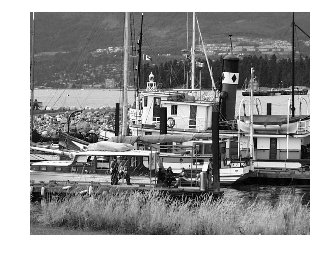

In [31]:
#Load the image
path_to_image = '../tests/images/Gray/Gray_scale.png'
img = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
sr.show_image(img)

In [32]:
#Check if the image is actually grayscale
path_to_image = '../tests/images/Gray/Gray_scale.png'
img2 = cv2.imread(path_to_image)
print(sr.image_diff(img2[:,:,0], img, visualize=False))
print(sr.image_diff(img2[:,:,1], img, visualize=False))
print(sr.image_diff(img2[:,:,2], img, visualize=False))

True
True
True


In [33]:
SE_size_factor = 0.02
lam_factor = 3
lam = lam_factor * int(np.floor(SE_size_factor * np.sqrt(img.size / np.pi)))
print(lam )
area_factor_large=0.001
area_factor_verylarge=0.01
weights=(0.33, 0.33, 0.33)
offset=80
stepsize=1
connectivity=8

24


In [34]:
binarizer = sr.DatadrivenBinarizer(lam=lam, area_factor_large=area_factor_large, 
                                   area_factor_verylarge=area_factor_verylarge,
                                  weights=weights,
                                  offset=offset,
                                  stepsize=stepsize,
                                  connectivity=connectivity)

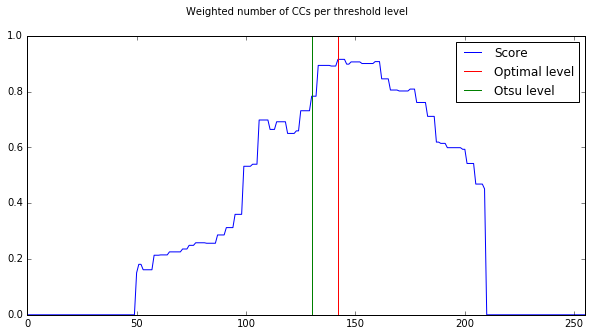

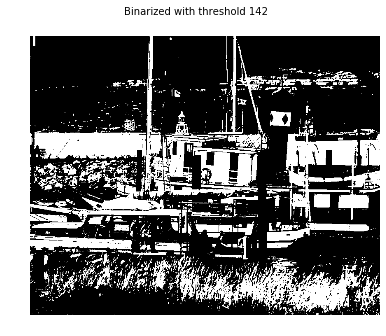

In [35]:
pylab.rcParams['figure.figsize'] = (10., 5.)
t, binarized, scores = binarizer.binarize_withthreshold(img, output_scores=True, visualize=True)

In [36]:
print("threshold: ", t, "true threshold:", 142)

('threshold: ', 142, 'true threshold:', 142)


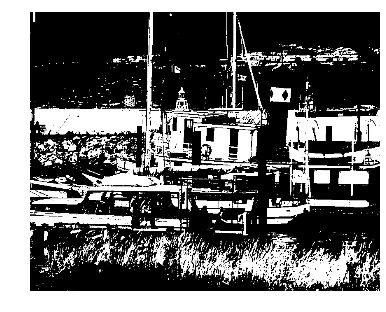

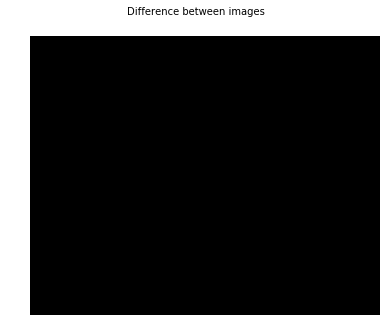

True

In [37]:
binarized_true = cv2.imread('../tests/images/Gray/Binarization_data_driven.png', cv2.IMREAD_GRAYSCALE)
sr.show_image(binarized_true)
sr.image_diff(binarized, binarized_true)